## AN EXAMINATION OF BIODIVERSITY AND SPECIES ENDANGERMENT IN NATIONAL PARKS

A project for my Codecademy Professional Certification (Data Scientist: Machine Learning Specialist)

DISCLAIMER: Data used here is fictionally generated and was given for purposes of the project by Codecademy.com. 

Robert Hall

08/07/2024

#### Table of Contents

* [Section 1](#explore-data-and-analyze-distribution-of-conservation-status-across-species): Explore data and analyze distribution of conservation status across species
* [Section 2](#are-certain-species-more-likely-to-be-endangered-than-others): Are certain species more likely to be endangered than others?
* [Section 3](#are-there-statistically-significant-differences-in-needed-protection-between-species): Are there statistically significant differences in needed protection between species?
* [Section 4](#overall-conclusions-and-key-takeaways): Overall conclusions and key takeaways

#### Load Data and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Explore data and analyze distribution of conservation status across species

Number of unique species in dataset: *species*

In [4]:
n_unique_species = species.scientific_name.nunique()
print(f"Number of Unique Species: {n_unique_species}")

Number of Unique Species: 5541


Species categories and their frequencies

In [5]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### Are certain species more likely to be endangered than others?

Conservation status categories and their frequencies

In [6]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

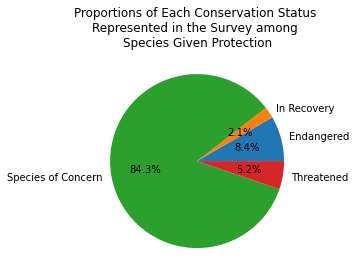

<Figure size 432x288 with 0 Axes>

In [14]:
labels=['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
plt.pie(species.groupby('conservation_status').size(), autopct='%1.1f%%', labels=labels)
plt.title("Proportions of Each Conservation Status \nRepresented in the Survey among \nSpecies Given Protection")
plt.show()
plt.clf()

Analyze distribution of each conservation status by species

In [7]:
conservation_category = species[species['conservation_status'] != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, "Species' Distribution Among Each Category of Protection")

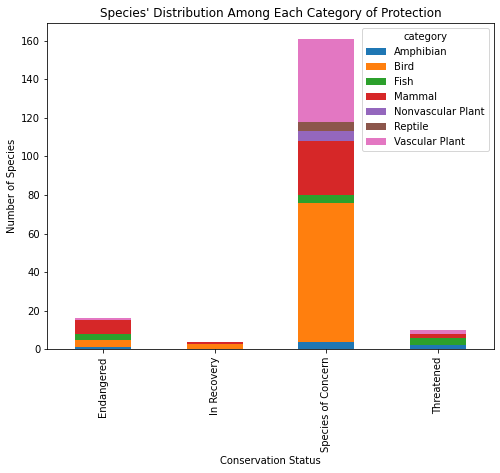

In [9]:
ax = conservation_category.plot(kind='bar',
                                figsize=(8,6),
                                stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Species\' Distribution Among Each Category of Protection')

#### Are there statistically significant differences in needed protection between species?

Preparation for a Chi2 Test for Association between different categories of flora and fauna:

In [ ]:
species['is_protected'] = species['conservation_status'].isnull()

In [ ]:
conservation_categories = species.groupby(['category', 'is_protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected',
           index='category',
           values='scientific_name')\
    .reset_index()

conservation_categories.columns = ['Category', 'Protected', 'Not Protected']

conservation_categories['% Protected'] = round((conservation_categories['Protected'] / (conservation_categories['Protected'] + conservation_categories['Not Protected'])) * 100, 2)

conservation_categories

,Category,Protected,Not Protected,% Protected
0,Amphibian,7,72,8.86
1,Bird,75,413,15.37
2,Fish,11,115,8.73
3,Mammal,30,146,17.05
4,Nonvascular Plant,5,328,1.50
5,Reptile,5,73,6.41
6,Vascular Plant,46,4216,1.08


Question 1: *Is there a statistically significant difference in the endangerment level of amphibians as compared to fish?*

Ho: *There exists no statistically significant difference between the endangerment level of amphibians as compared to the endangerment level of fish.*

Ha: *There does exist a statistically significant difference between the endangerment level of amphibians as compared to the endangerment level of fish.*

In [ ]:
from scipy.stats import chi2_contingency

sig = 0.05 		# significance threshold

amph_params = [7, 72] # amphibians protected, amphibians not protected
fish_params = [11, 115] # fish protected, mammals not protected
amph_ratio = round(amph_params[0] / amph_params[1], 5)
fish_ratio = round(fish_params[0] / fish_params[1], 5)

contingency = [fish_params, amph_params] 
chi2, pval, dof, expected = chi2_contingency(contingency)

print(f"Proportion of Fish Endangered: 	{fish_ratio}")
print(f"proportion of Amphibians Endangered: 	{amph_ratio}")

if pval < sig:
	print(f"p-value: 		{round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Reject Null Hypothesis: Statistically Significant Relationship")
elif pval > sig: 
	print(f"p-value: 		{round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Do not reject Null Hypothesis: No Significant Difference Between Two Variables")

Proportion of Mammals Endangered: 	0.09565
proportion of Amphibians Endangered: 	0.09722
p-value: 		1.0
significance threshold: 0.05
Do not reject Null Hypothesis: No Significant Difference Between Two Variables


Conclusion 1: Given that the probability of observing the data given Ho being true is so high (a rounded probability of 1.0), the null hypothesis is easily not rejected, and we can assume no significant difference between risk of endangerment to amphibians and risk of endangerment to fish. 

Notably, there is very little difference in the proportion of fish under protection (Pf = 0.0956) compared to the proportion of amphibians under protection (Pa = 0.0972) in this sample.

Question 2: *Is there a statistically significant difference in the endangerment level of reptiles as compared to mammals?*

Ho: *There exists no statistically significant difference between the endangerment level of reptiles as compared to the endangerment level of mammals.*

Ha: *There does exist a statistically significant difference between the endangerment level of reptiles as compared to the endangerment level of mammals.*

In [ ]:
from scipy.stats import chi2_contingency

sig = 0.05 		# significance threshold

rept_params = [5, 73] # reptiles protected, reptiles not protected
mamm_params = [30, 146] # mammals protected, mammals not protected
rept_ratio = round(rept_params[0] / rept_params[1], 5)
mamm_ratio = round(mamm_params[0] / mamm_params[1], 5)

contingency = [mamm_params, rept_params]
chi2, pval, dof, expected = chi2_contingency(contingency)

print(f"Proportion of Reptiles Protected: 	{rept_ratio}")
print(f"proportion of Mammals Protected: 	{mamm_ratio}")

if pval < sig:
	print(f"p-value: 		{round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Reject Null Hypothesis: Statistically Significant Relationship")
elif pval > sig: 
	print(f"p-value:                {round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Do not reject Null Hypothesis: No Significant Difference Between Two Variables")

Proportion of Reptiles Protected: 	0.06849
proportion of Mammals Protected: 	0.20548
p-value: 		0.0384
significance threshold: 0.05
Reject Null Hypothesis: Statistically Significant Relationship


Conclusion 2: Given that the probability of observing the data given the alternative hypothesis (Ha) being true is so high (p = 0.0384), the null hypothesis is rejected, and we can assume that there is a statistically significant difference in the risk of endangerment between reptiles and mammals. 

Since the proportion of mammals protected (Pm = 0.205) is higher than the proportion of Reptiles protected (Pr = 0.068), we can assume that mammals are at a statistically significant higher risk of endangerment than reptiles are.

Question 3: *Is there a statistically significant difference in the endangerment level of nonvascular plants as compared to vascular plants?*

Ho: *There exists no statistically significant difference between the endangerment level of nonvascular plants as compared to the endangerment level of vascular plants.*

Ha: *There does exist a statistically significant difference between the endangerment level of nonvascular plants as compared to the endangerment level of vascular plants.*

In [ ]:
from scipy.stats import chi2_contingency

sig = 0.05 		# significance threshold

v_params = [5, 328] # vascular protected, vascular not protected
nv_params = [46, 4216] # nonvascular protected, nonvascular not protected
v_ratio = round(v_params[0] / v_params[1], 5)
nv_ratio = round(nv_params[0] / nv_params[1], 5)

contingency = [v_params, nv_params]
chi2, pval, dof, expected = chi2_contingency(contingency)

print(f"Proportion of Vascular Plants Protected: 	{v_ratio}")
print(f"proportion of Nonvascular Plants Protected: 	{nv_ratio}")

if pval < sig:
	print(f"p-value: 		{round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Reject Null Hypothesis: Statistically Significant Relationship")
elif pval > sig: 
	print(f"p-value:                {round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Do not reject Null Hypothesis: No Significant Difference Between Two Variables")

Proportion of Vascular Plants Protected: 	0.01524
proportion of Nonvascular Plants Protected: 	0.01091
p-value:                0.6623
significance threshold: 0.05
Do not reject Null Hypothesis: No Significant Difference Between Two Variables


Conclusion 3: Given that the probability of observing the data given the null hypothesis (Ho) to be true is higher than the significance threshold of 0.05 (p > 0.66), the alternative hypothesis is rejected, and it is assumed that there is no statistically significant difference in the risk of endangerment between vascular and non-vascular plants.

Notably, there is little difference between the proportion of endangered vascular plant samples (Pv = 0.01524) and the proportion of endangered nonvascular plant samples (Pnv = 0.01091).

Question 4: *Is there a statistically significant difference in the endangerment level of reptiles as compared to birds?*

Ho: *There exists no statistically significant difference between the endangerment level of reptiles as compared to the endangerment level of birds.*

Ha: *There does exist a statistically significant difference between the endangerment level of reptiles as compared to the endangerment level of birds.*

In [ ]:
from scipy.stats import chi2_contingency

sig = 0.05 		# significance threshold

rept_params = [5, 73] # reptiles protected, reptiles not protected
bird_params = [75, 413] # birds protected, birds not protected
rept_ratio = round(rept_params[0] / rept_params[1], 5)
bird_ratio = round(bird_params[0] / bird_params[1], 5)

contingency = [rept_params, bird_params]
chi2, pval, dof, expected = chi2_contingency(contingency)

print(f"Proportion of Reptiles Protected: 	{rept_ratio}")
print(f"proportion of Birds Protected: 	{bird_ratio}")

if pval < sig:
	print(f"p-value: 		{round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Reject Null Hypothesis: Statistically Significant Relationship")
elif pval > sig: 
	print(f"p-value:                {round(pval, 4)}")
	print(f"significance threshold: {round(sig, 2)}")
	print("Do not reject Null Hypothesis: No Significant Difference Between Two Variables")

Proportion of Reptiles Protected: 	0.06849
proportion of Birds Protected: 	0.1816
p-value:                0.0531
significance threshold: 0.05
Do not reject Null Hypothesis: No Significant Difference Between Two Variables


Conclusion 4: Since technically the probability of observing the data given the null hypothesis (Ho) to be true is higher than the significance threshold of 0.05 (p = 0.0531), the alternative hypothesis is rejected, and it is assumed that there is no statistically significant difference in the risk of endangerment between reptiles and birds.

However, there is a noticable difference in the proportion of reptiles protected (Pr = 0.068) when compared to the proportion of birds protected (Pb = 0.182).

#### Overall Conclusions and Key Takeaways

*What is the Distribution of Conservation Status Across Species?*
* There are 5541 unique species present in this study.
* Vascular plants are by far the most prevalent group of species present in the survey.
* Very few species are designated as needing conservation; 191 of the 5541 species are in need of conservation efforts.

*Are Certain Species More Likely to be Endangered than Others?*
* The species with the highest proportion of conservation designations overall goes to birds, where most of the birds under conservation efforts fall under "species of concern".

*Are there statistically significant differences between species and conservation status?*
* Certain species have more statistically significant risks of needing protection efforts than others.
* Mammals are at a statistically significant higher risk of needing protection than Reptiles (p = 0.0384).
* There is not a statistically significant higher risk of needing protection among Amphibians compared to Fish (p = 1.0), or among Vascular and Nonvascular Plants (p = 0.6623), or (barely) among Reptiles and Birds (p = 0.0531).